In [1]:
import MySQLdb, pickle
import pandas as pd
from sqlalchemy import create_engine
from collections import Counter

In [3]:
# read local car_info popular 
# pw = pickle.load(open('./Data/pw.p','rb'))

db = MySQLdb.connect(
    "127.0.0.1",
    "root",
    '0',
    "car_info",
    charset='utf8',
)

SQL_QUERY = """
    SELECT *
    FROM car_info;
"""

train = pd.read_sql(SQL_QUERY, db)
train.head(20)

,index,year,title,company,subname,mile,photos,video,exterior_color,interior_color,transmission,drivetrain,star,review_no,vendor,price
0,0,2007,chevrolet suburban lt,chevrolet,suburban,121372,29,1,summit,light titanium ebony,4-speed,rwd,5,7,autorama,13900
1,1,2017,mercedes-benz gls 550 base 4matic,mercedes-benz,gls,19644,32,1,designo,saddle brown black,9-speed,4wd,5,83,momentummotorcars,74990
2,2,2012,mercedes-benz c 250 luxury,mercedes-benz,c,65374,32,1,black,cappuccino,7-speed,rwd,5,10,southern auto brokers,12998
3,3,2016,porsche cayman gt4,porsche,cayman,14698,32,1,gray,black,6-speed,rwd,5,10,exclusive auto wholesale,90997
4,4,2010,mercedes-benz e 550,mercedes-benz,e,58204,32,1,iridium,black,7-speed,rwd,5,26,inetwork auto group,18549
5,5,2014,mercedes-benz s 550,mercedes-benz,s,121078,32,1,palladium,silk beige,7-speed,rwd,5,937,hendrickbmw,32991
6,6,2009,mercedes-benz 3.5l,mercedes-benz,3.5l,59789,29,1,black,black,7-speed,rwd,5,107,unique automotives llc,9980
7,7,2008,volvo v70 3.2,volvo,v70,169982,32,1,burgundy,tan,6-speed,fwd,5,16,sharpmotors,4750
8,8,2011,jaguar xf premium,jaguar,xf,82279,25,1,black,black,6-speed,rwd,5,7,"cars of tampa, inc",14995
9,9,2004,jaguar xj8,jaguar,xj8,83656,26,1,gray,gray,6-speed,rwd,5,7,"cars of tampa, inc",4995


In [4]:
company_list = []
for company in Counter(train.company).most_common(30):
    company_list.append(company[0])

In [5]:
idx_list = []
idx = 0
for i in train["company"]:
    if i not in company_list:
        idx_list.append(idx)
    idx += 1

In [6]:
train.shape

(4900, 16)

In [7]:
train = train.drop(idx_list)
train.reset_index(drop=True, inplace=True)
train = train.drop("index", axis=1)

Feature engineering

In [8]:
categorical_features = ['company', 'subname','transmission', 'drivetrain']

In [9]:
dummy_cat = pd.get_dummies(train[categorical_features])
dummy_cat.head()

,company_acura,company_audi,company_bmw,company_buick,company_cadillac,company_chevrolet,company_chrysler,company_dodge,company_ford,company_gmc,...,transmission_4-speed,transmission_5-speed,transmission_6-speed,transmission_7-speed,transmission_8-speed,transmission_9-speed,transmission_x-speed,drivetrain_4wd,drivetrain_fwd,drivetrain_rwd
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
numerical_features = ['year', 'mile', 'photos', 'star', 'review_no','price']

In [11]:
normalize_num = np.log1p(train[numerical_features])
normalize_num.head()

,year,mile,photos,star,review_no,price
0,7.604894,11.706624,3.401197,1.791759,2.079442,9.539716
1,7.609862,9.885578,3.496508,1.791759,4.430817,11.225123
2,7.607381,11.087895,3.496508,1.791759,2.397895,9.472628
3,7.609367,9.595535,3.496508,1.791759,2.397895,11.418593
4,7.606387,10.971727,3.496508,1.791759,3.295837,9.828225


In [12]:
# pre_train = pd.merge(normalize_num, dummy_cat) 
X_train_0 = normalize_num.join(dummy_cat)
y_train = X_train_0["price"]
X_train = X_train_0.drop("price", axis=1)

In [13]:
from xgboost import XGBRegressor
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)

/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
clf = XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=False)

In [15]:
%time score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=-1, scoring="r2").mean()

print("Score = {0:.5f}".format(score))

CPU times: user 199 ms, sys: 59.4 ms, total: 259 ms
Wall time: 2min 19s
Score = 0.85429


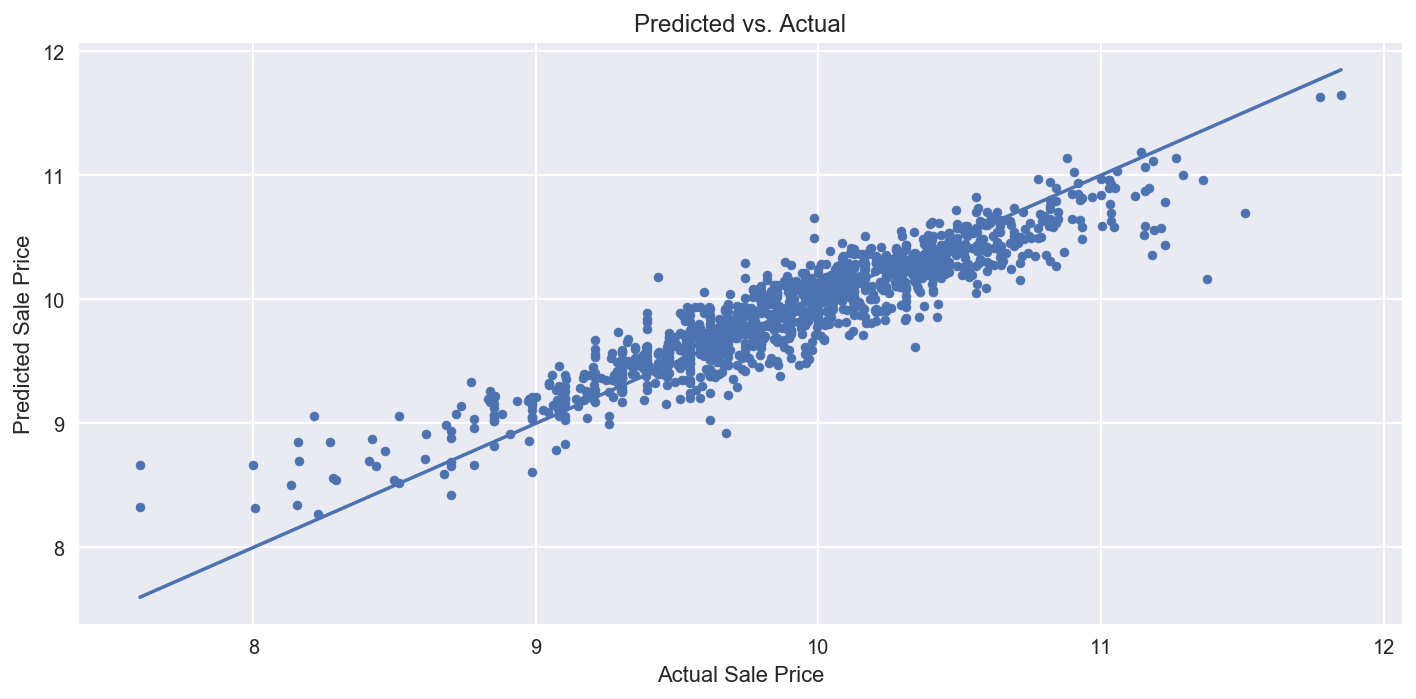

In [16]:
clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()